In [15]:
# If importing from google colab
    # from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd



Importing the dataset already cleaned and pre-processed from an excel

In [16]:
# If importing from google colab
    # drive.mount("/content/gdrive", force_remount=True)
    # df = pd.DataFrame(pd.read_excel("/content/gdrive/MyDrive/output_def.xlsx"))
df = pd.read_excel("output_def.xlsx")

## Univariate Analysis

Plotting with the different variables in order to see the distribution of the different values and looking on those variables which are of interest

In [17]:
df_preprocessed_def = pd.read_excel("output_def_2.xlsx")

     side_left  side_right  side_unkwnown
ehr          7           7            233
     grade_1.0  grade_2.0  grade_3.0
ehr         46        170         31
     hist_type_ductal  hist_type_lobular  hist_type_unknown
ehr               117                 20                104
          YES  NO
invasive  213  34
     er_positive  pr_positive
ehr          208          183
          ki67  ehr
0    20.465116    0
1    20.465116    1
2     0.000000    2
3    17.000000    3
4    44.000000    4
..         ...  ...
242  20.465116  242
243  20.465116  243
244  20.465116  244
245  20.465116  245
246  20.465116  246

[247 rows x 2 columns]
          ki67  ehr
0    20.465116    0
1    20.465116    1
2     0.000000    2
3    17.000000    3
4    44.000000    4
..         ...  ...
242  20.465116  242
243  20.465116  243
244  20.465116  244
245  20.465116  245
246  20.465116  246

[247 rows x 2 columns]
          ki67  ehr
0    20.465116    0
1    20.465116    1
2     0.000000    2
3    17.000000    

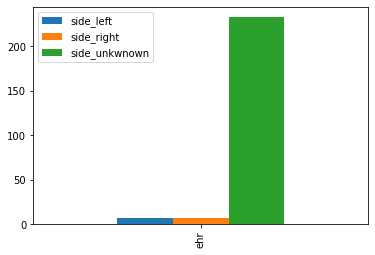

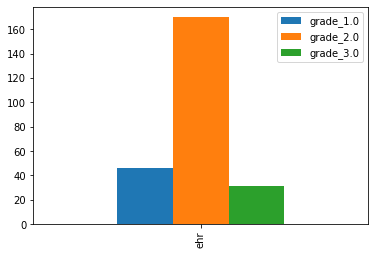

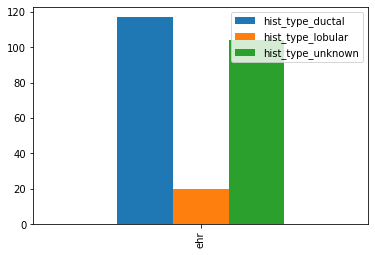

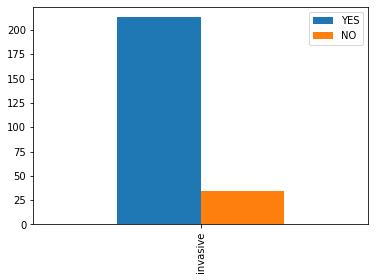

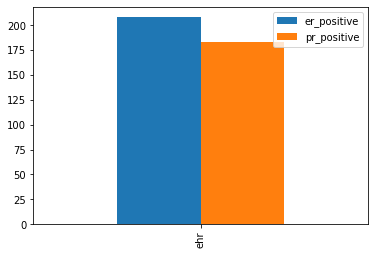

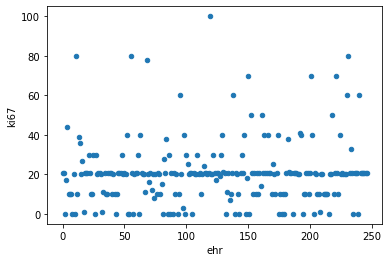

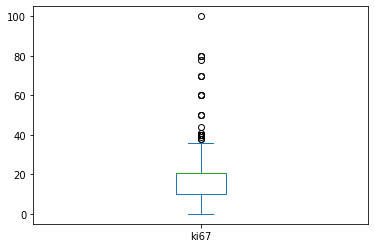

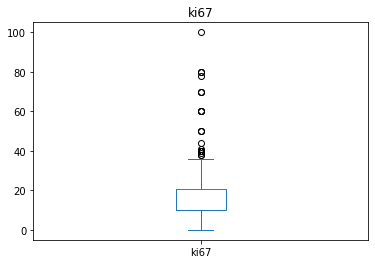

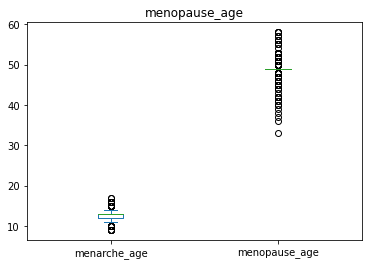

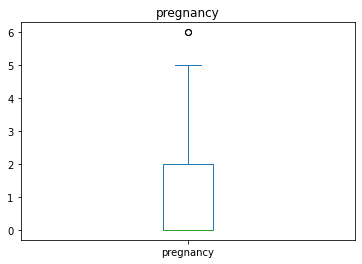

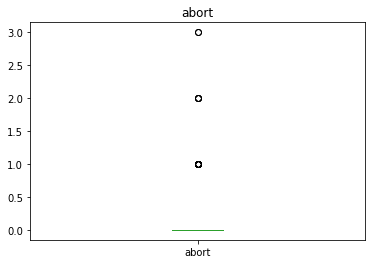

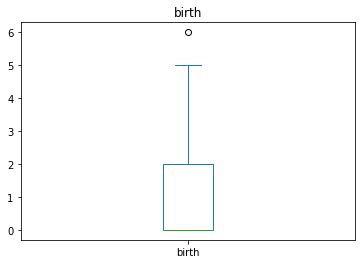

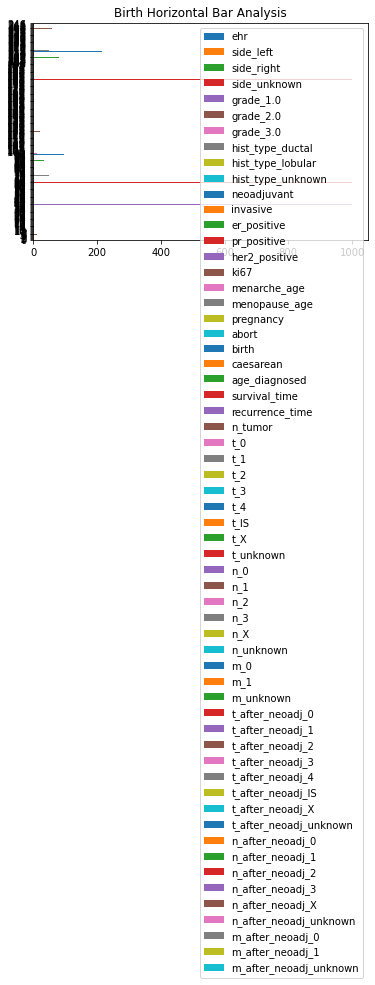

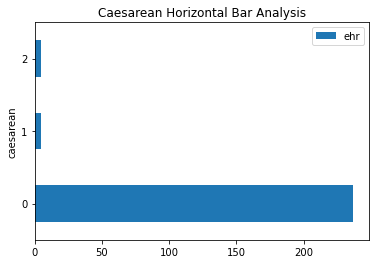

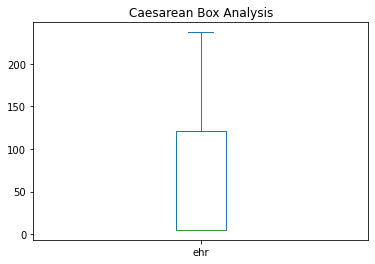

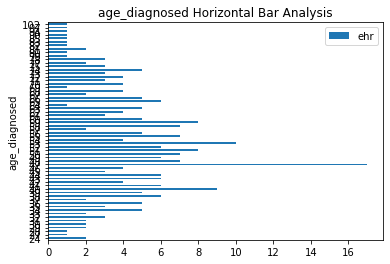

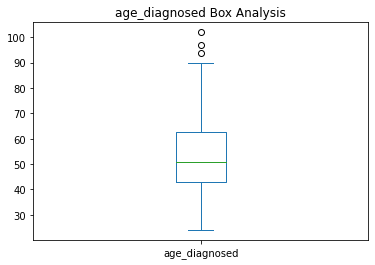

In [18]:
# Bar plot of sides of the tumours
arr = [[df_preprocessed_def['side_left'].astype(int).sum(),df_preprocessed_def['side_right'].astype(int).sum(),df_preprocessed_def['side_unknown'].astype(int).sum()]]

# converting the array to DF
df_aux = pd.DataFrame(arr,
                   index = ['ehr'],
                   columns = ['side_left', 'side_right', 'side_unkwnown'])

print(df_aux)
df_aux.plot.bar()


# Bar plot of the grades of the tumours
arr = [[df_preprocessed_def['grade_1.0'].astype(int).sum(),df_preprocessed_def['grade_2.0'].astype(int).sum(),df_preprocessed_def['grade_3.0'].astype(int).sum()]]

# converting the array to DF
df_aux = pd.DataFrame(arr,
                   index = ['ehr'],
                   columns = ['grade_1.0', 'grade_2.0', 'grade_3.0'])

print(df_aux)
df_aux.plot.bar()


# Bar plot of the hist_type of the tumours
arr = [[df_preprocessed_def['hist_type_ductal'].astype(int).sum(),df_preprocessed_def['hist_type_lobular'].astype(int).sum(),df_preprocessed_def['hist_type_unknown'].astype(int).sum()]]

# converting the array to DF
df_aux = pd.DataFrame(arr,
                   index = ['ehr'],
                   columns = ['hist_type_ductal', 'hist_type_lobular', 'hist_type_unknown'])

print(df_aux)
df_aux.plot.bar()



# Bar plot of the invasive tumours
arr = [[df_preprocessed_def['invasive'].astype(int).sum(), (df_preprocessed_def['invasive'].shape[0] - df_preprocessed_def['invasive'].astype(int).sum())]]

# converting the array to DF
df_aux = pd.DataFrame(arr,
                   index = ['invasive'],
                   columns = ['YES', 'NO'])

print(df_aux)
df_aux.plot.bar()


# Bar plot of the er_positive, pr_positive
arr = [[df_preprocessed_def['er_positive'].astype(int).sum(), df_preprocessed_def['pr_positive'].astype(int).sum()]]

# converting the array to DF
df_aux = pd.DataFrame(arr,
                   index = ['ehr'],
                   columns = ['er_positive', 'pr_positive'])

print(df_aux)
df_aux.plot.bar()


# Scatter plot of the ki67
df_preprocessed_def['ehr'] = df_preprocessed_def.index
print(df_preprocessed_def.loc[:, ['ki67', 'ehr']])

#df_preprocessed_def.loc[:, ['ki67']].plot()

df_preprocessed_def.loc[:, ['ki67', 'ehr']].plot(kind='scatter',    # kind of plot to show
        x='ehr',
        y='ki67'
       )

# Box plot of the ki67
df_preprocessed_def['ehr'] = df_preprocessed_def.index
print(df_preprocessed_def.loc[:, ['ki67', 'ehr']])

#df_preprocessed_def.loc[:, ['ki67']].plot()

df_preprocessed_def.loc[:, ['ki67', 'ehr']].plot(kind='box',    # kind of plot to show
        x='ehr',
        y='ki67'
       )


# Box plot of the ki67
df_preprocessed_def['ehr'] = df_preprocessed_def.index
print(df_preprocessed_def.loc[:, ['ki67', 'ehr']])

df_preprocessed_def.loc[:, ['ki67', 'ehr']].plot(kind='box',    # kind of plot to show
        x='ehr',
        y='ki67',
        title='ki67'
       )

# Box plot of the menarche_age, menopause_age
print(df_preprocessed_def.loc[:, ['menopause_age', 'menarche_age', 'ehr']])

df_preprocessed_def.loc[:, ['menopause_age', 'menarche_age', 'ehr']].plot(kind='box',    # kind of plot to show
        x='ehr',
        y=['menarche_age', 'menopause_age'],
        title='menopause_age'
       )

# Pregnancy analysis
df_preprocessed_def.loc[:, ['pregnancy', 'ehr']].plot(kind='box',    # kind of plot to show
        x='ehr',
        y='pregnancy',
        title='pregnancy'
       )

# Abort analysis
df_preprocessed_def.loc[:, ['abort', 'ehr']].plot(kind='box',    # kind of plot to show
        x='ehr',
        y='abort',
        title='abort'
       )

# Birth analysis
df_preprocessed_def.loc[:, ['birth', 'ehr']].plot(kind='box',    # kind of plot to show
        x='ehr',
        y='birth',
        title='birth'
       )

df_birth = pd.DataFrame(df_preprocessed_def.groupby(['birth'])['ehr'].count())
print(df_birth)

df_birth.plot(kind = 'barh',
         title = 'Birth Horizontal Bar Analysis')

# Caesarean analysis
print(df_preprocessed_def.groupby(['caesarean'])['ehr'].count())
pd.DataFrame(df_preprocessed_def.groupby(['caesarean'])['ehr'].count()).plot(kind = 'barh',
                                                                              title = 'Caesarean Horizontal Bar Analysis')

pd.DataFrame(df_preprocessed_def.groupby(['caesarean'])['ehr'].count()).plot(kind = 'box',
                                                                              title = 'Caesarean Box Analysis')


# 'age_diagnosed' analysis
print(df_preprocessed_def.groupby(['age_diagnosed'])['ehr'].count())
pd.DataFrame(df_preprocessed_def.groupby(['age_diagnosed'])['ehr'].count()).plot(kind = 'barh',
                                                                              title = 'age_diagnosed Horizontal Bar Analysis')

pd.DataFrame(df_preprocessed_def['age_diagnosed']).plot(kind = 'box',
                                                         title = 'age_diagnosed Box Analysis')


age_diagnosed_df = pd.DataFrame(df_preprocessed_def.groupby(['age_diagnosed'])['ehr'].count())

- n_tumor analysis

n_tumor
1    245
3      2
Name: ehr, dtype: int64


<AxesSubplot:title={'center':'n_tumor Box Analysis'}>

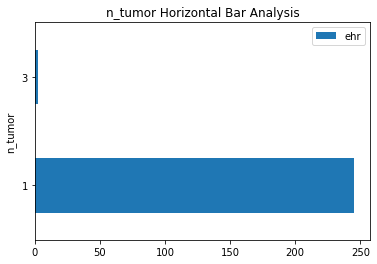

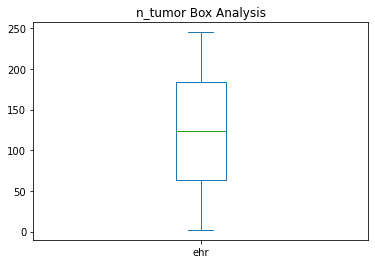

In [19]:
print(df_preprocessed_def.groupby(['n_tumor'])['ehr'].count())
pd.DataFrame(df_preprocessed_def.groupby(['n_tumor'])['ehr'].count()).plot(kind = 'barh',
                                                                              title = 'n_tumor Horizontal Bar Analysis')

pd.DataFrame(df_preprocessed_def.groupby(['n_tumor'])['ehr'].count()).plot(kind = 'box',
                                                                              title = 'n_tumor Box Analysis')

## Bivariate Analysis

Looking at the correlation between different variables

In [20]:
print(df)

     ehr  side_left  side_right  side_unknown  grade_1.0  grade_2.0  \
0      0          0           0             1          1          0   
1      1          0           0             1          0          1   
2      2          0           0             1          1          0   
3      3          0           0             1          0          0   
4      4          0           0             1          0          1   
..   ...        ...         ...           ...        ...        ...   
242  242          0           0             1          0          1   
243  243          0           0             1          0          1   
244  244          0           0             1          0          1   
245  245          0           0             1          0          1   
246  246          0           0             1          0          1   

     grade_3.0  hist_type_ductal  hist_type_lobular  hist_type_unknown  ...  \
0            0                 1                  0                 

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

# Labelizer contiene el numero de datos que contiene ambas etiquetas (Se ve en crosstable)
def categorical_relation(var1,var2,labelizer):
  crosstable=pd.crosstab(df[var1],df[var2])
  print(crosstable)
  labelizer= labelizer
  mosaic(df,[var1,var2],gap=0.01, title='Relation between ' + var1 + ' and ' + var2,horizontal = False,labelizer = labelizer)

categorical_relation('neoadjuvant','grade',
                      lambda k:{('0','1'):44  ,('0','2'):136  ,('0','3'):18,('1','1'):2,('1','2'):34,('1','3'):13}[k])

KeyError: 'grade'

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


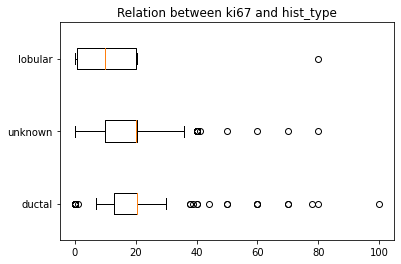

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


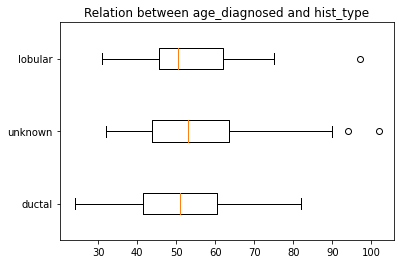

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


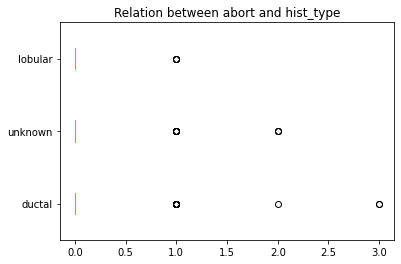

In [78]:
def boxplot(categorical, numerical):
  data = []
  for type in (df[categorical]).unique():
    aux = []
    for i in range(len(df['ehr'])):
      if df[categorical][i] == type:
        aux.append(df[numerical][i])
    data.append(aux)

  plt.boxplot(data, vert = False, labels = df[categorical].unique())
  plt.title("Relation between " + numerical +" and "+ categorical)
  plt.show()

boxplot('hist_type','ki67')
boxplot('hist_type','age_diagnosed')
boxplot('hist_type','abort')




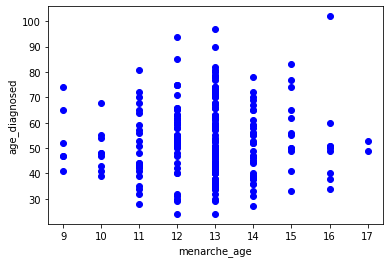

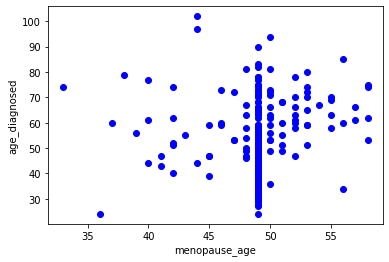

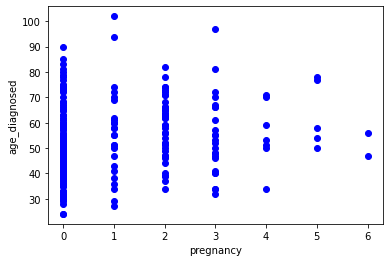

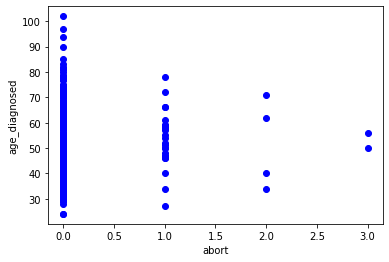

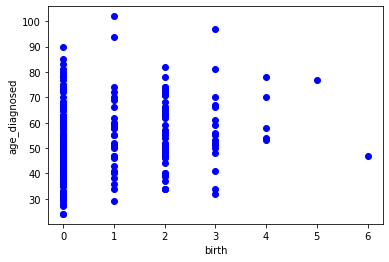

In [75]:
def numerical_relation(var1,var2):
  data1 = df[var1]
  data2 = df[var2]
  plt.plot(data1,data2,"bo")
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

# Relation between age of diagnose and other variables
numerical_relation('menarche_age','age_diagnosed')
numerical_relation('menopause_age','age_diagnosed')
numerical_relation('pregnancy','age_diagnosed')
numerical_relation('abort','age_diagnosed')
numerical_relation('birth','age_diagnosed')